In [ ]:
import os
# Find the latest version of spark 3.0  from http://www.apache.org/dist/spark/ and enter as the spark version
# For example:
# spark_version = 'spark-3.0.3'
spark_version = 'spark-3.<enter version>'
os.environ['SPARK_VERSION']=spark_version

# Install Spark and Java
!apt-get update
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://www.apache.org/dist/spark/$SPARK_VERSION/$SPARK_VERSION-bin-hadoop2.7.tgz
!tar xf $SPARK_VERSION-bin-hadoop2.7.tgz
!pip install -q findspark

# Set Environment Variables
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = f"/content/{spark_version}-bin-hadoop2.7"

# Start a SparkSession
import findspark
findspark.init()

In [ ]:
# Start Spark session
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("sparkDates").getOrCreate()

In [3]:
# Load in data
from pyspark import SparkFiles
url ="https://s3.amazonaws.com/dataviz-curriculum/day_1/rainfall.csv"
spark.sparkContext.addFile(url)
df = spark.read.csv(SparkFiles.get("rainfall.csv"), sep=",", header=True, inferSchema=True, timestampFormat="yyyy/MM/dd HH:mm:ss")
df.show()

+-----------+-------------------+----+----+
|    station|               date|prcp|tobs|
+-----------+-------------------+----+----+
|USC00519397|2010-01-01 00:00:00|0.08|  65|
|USC00519397|2010-01-02 00:00:00| 0.0|  63|
|USC00519397|2010-01-03 00:00:00| 0.0|  74|
|USC00519397|2010-01-04 00:00:00| 0.0|  76|
|USC00519397|2010-01-07 00:00:00|0.06|  70|
|USC00519397|2010-01-08 00:00:00| 0.0|  64|
|USC00519397|2010-01-09 00:00:00| 0.0|  68|
|USC00519397|2010-01-10 00:00:00| 0.0|  73|
|USC00519397|2010-01-11 00:00:00|0.01|  64|
|USC00519397|2010-01-12 00:00:00| 0.0|  61|
|USC00519397|2010-01-14 00:00:00| 0.0|  66|
|USC00519397|2010-01-15 00:00:00| 0.0|  65|
|USC00519397|2010-01-16 00:00:00| 0.0|  68|
|USC00519397|2010-01-17 00:00:00| 0.0|  64|
|USC00519397|2010-01-18 00:00:00| 0.0|  72|
|USC00519397|2010-01-19 00:00:00| 0.0|  66|
|USC00519397|2010-01-20 00:00:00| 0.0|  66|
|USC00519397|2010-01-21 00:00:00| 0.0|  69|
|USC00519397|2010-01-22 00:00:00| 0.0|  67|
|USC00519397|2010-01-23 00:00:00

In [4]:
# Show schema to confirm date type
df.printSchema()

root
 |-- station: string (nullable = true)
 |-- date: timestamp (nullable = true)
 |-- prcp: double (nullable = true)
 |-- tobs: integer (nullable = true)



In [5]:
# Import date time functions
from pyspark.sql.functions import year

# Show the year for the date column
df.select(year(df["date"])).show()

+----------+
|year(date)|
+----------+
|      2010|
|      2010|
|      2010|
|      2010|
|      2010|
|      2010|
|      2010|
|      2010|
|      2010|
|      2010|
|      2010|
|      2010|
|      2010|
|      2010|
|      2010|
|      2010|
|      2010|
|      2010|
|      2010|
|      2010|
+----------+
only showing top 20 rows



In [6]:
# Save the year as a new column
df = df.withColumn("year", year(df['date']))
df.show()

+-----------+-------------------+----+----+----+
|    station|               date|prcp|tobs|year|
+-----------+-------------------+----+----+----+
|USC00519397|2010-01-01 00:00:00|0.08|  65|2010|
|USC00519397|2010-01-02 00:00:00| 0.0|  63|2010|
|USC00519397|2010-01-03 00:00:00| 0.0|  74|2010|
|USC00519397|2010-01-04 00:00:00| 0.0|  76|2010|
|USC00519397|2010-01-07 00:00:00|0.06|  70|2010|
|USC00519397|2010-01-08 00:00:00| 0.0|  64|2010|
|USC00519397|2010-01-09 00:00:00| 0.0|  68|2010|
|USC00519397|2010-01-10 00:00:00| 0.0|  73|2010|
|USC00519397|2010-01-11 00:00:00|0.01|  64|2010|
|USC00519397|2010-01-12 00:00:00| 0.0|  61|2010|
|USC00519397|2010-01-14 00:00:00| 0.0|  66|2010|
|USC00519397|2010-01-15 00:00:00| 0.0|  65|2010|
|USC00519397|2010-01-16 00:00:00| 0.0|  68|2010|
|USC00519397|2010-01-17 00:00:00| 0.0|  64|2010|
|USC00519397|2010-01-18 00:00:00| 0.0|  72|2010|
|USC00519397|2010-01-19 00:00:00| 0.0|  66|2010|
|USC00519397|2010-01-20 00:00:00| 0.0|  66|2010|
|USC00519397|2010-01

In [7]:
# Find the average precipitation per year
averages = df.groupBy("year").avg()
averages.orderBy("year").select("year", "avg(prcp)").show()

+----+-------------------+
|year|          avg(prcp)|
+----+-------------------+
|2010|0.13852293920179035|
|2011| 0.1637348927875241|
|2012| 0.1163805668016194|
|2013|0.15554567502020986|
|2014|0.17855953372189803|
|2015|0.19919999999999985|
|2016|0.17984533591106822|
|2017|0.16592738752959774|
+----+-------------------+



In [8]:
from pyspark.sql.functions import month
df.select(month(df['Date'])).show()

+-----------+
|month(Date)|
+-----------+
|          1|
|          1|
|          1|
|          1|
|          1|
|          1|
|          1|
|          1|
|          1|
|          1|
|          1|
|          1|
|          1|
|          1|
|          1|
|          1|
|          1|
|          1|
|          1|
|          1|
+-----------+
only showing top 20 rows



In [9]:
df = df.withColumn("month", month(df['date']))
df.head()

Row(station='USC00519397', date=datetime.datetime(2010, 1, 1, 0, 0), prcp=0.08, tobs=65, year=2010, month=1)

In [10]:
maxes = df.groupBy("month").max()
maxes.orderBy("month").select("month", "max(prcp)").show()

+-----+---------+
|month|max(prcp)|
+-----+---------+
|    1|     8.81|
|    2|     5.04|
|    3|     6.38|
|    4|     6.25|
|    5|     4.07|
|    6|     4.43|
|    7|    11.53|
|    8|     4.81|
|    9|     6.83|
|   10|     4.47|
|   11|     8.06|
|   12|     6.42|
+-----+---------+



In [11]:
# Import the summarized data to a pandas dataframe for plotting
# Note: If your summarized data is still too big for your local memory then your notebook may crash

pandas_df = maxes.orderBy("month").select("month", "max(prcp)").toPandas()
pandas_df.head()

,month,max(prcp)
0,1,8.81
1,2,5.04
2,3,6.38
3,4,6.25
4,5,4.07


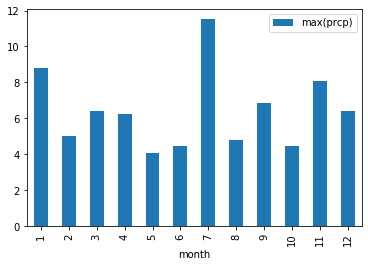

In [12]:
import matplotlib.pyplot as plt
pandas_df.set_index("month", inplace=True)
pandas_df.plot.bar()